In [18]:
library(tidyverse)
library("readxl")
library(tidymodels)

In [19]:
# load the file
# this demonstrate that the dataset can be read from the web into R 

url <- "https://archive.ics.uci.edu/static/public/257/user+knowledge+modeling.zip"
download.file(url, "user_data.zip")
unzip("user_data.zip")
user_data_old <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls",sheet=2)
head(user_data_old)

New names:
• `` -> `...7`
• `` -> `...8`


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)


In [20]:
users <- user_data_old |> select(STG:UNS)
head(users)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


In [ ]:
# !!!!!!! say some words to illustrate that our dataset is in tidy format? !!!!!!

In [21]:
# Split the data into training and test

user_split <- initial_split(users, prop = 0.75, strata = UNS)
user_train <- training(user_split)
user_test <- testing(user_split) 

In [22]:
# the number of observations in each class  !!!!! How can this be helpful for our analysis? !!!!
# One idea is that we make sure there is no extreme class imbalance (see 5.7.2 in textbook).

n_class <- user_train |> group_by(UNS)|> summarize(count=n())
n_class

UNS,count
<chr>,<int>
High,48
Low,60
Middle,65
very_low,19


In [28]:
# the means of the predictor variables
# since there are no NAs in this summarize table, 
# it also means there are no NAs in the dataset

means <- user_train |> summarize(across(c(STG,SCG,PEG), mean))
means


STG,SCG,PEG
<dbl>,<dbl>,<dbl>
0.3737708,0.3542604,0.4590781


In [29]:
# standard deviations of the predictor variables
# Since sd and means of the predictors are on the same scale, we don't have to 
# center and scale, but I think we should do it whatever

sds <- user_train |> summarize(across(c(STG,SCG,PEG), sd))
sds

STG,SCG,PEG
<dbl>,<dbl>,<dbl>
0.2034978,0.2083629,0.2529953


In [31]:
# put all 3 predictors into one column to be able to compare subplots containing their distributions

user_train_wide <- user_train |> select(STG, SCG, PEG) |>
                pivot_longer(cols=c(STG,SCG,PEG),names_to="predictors",values_to="values")
head(user_train_wide)


predictors,values
<chr>,<dbl>
STG,0.08
SCG,0.08
PEG,0.90
STG,0.00
SCG,0.00
PEG,0.85


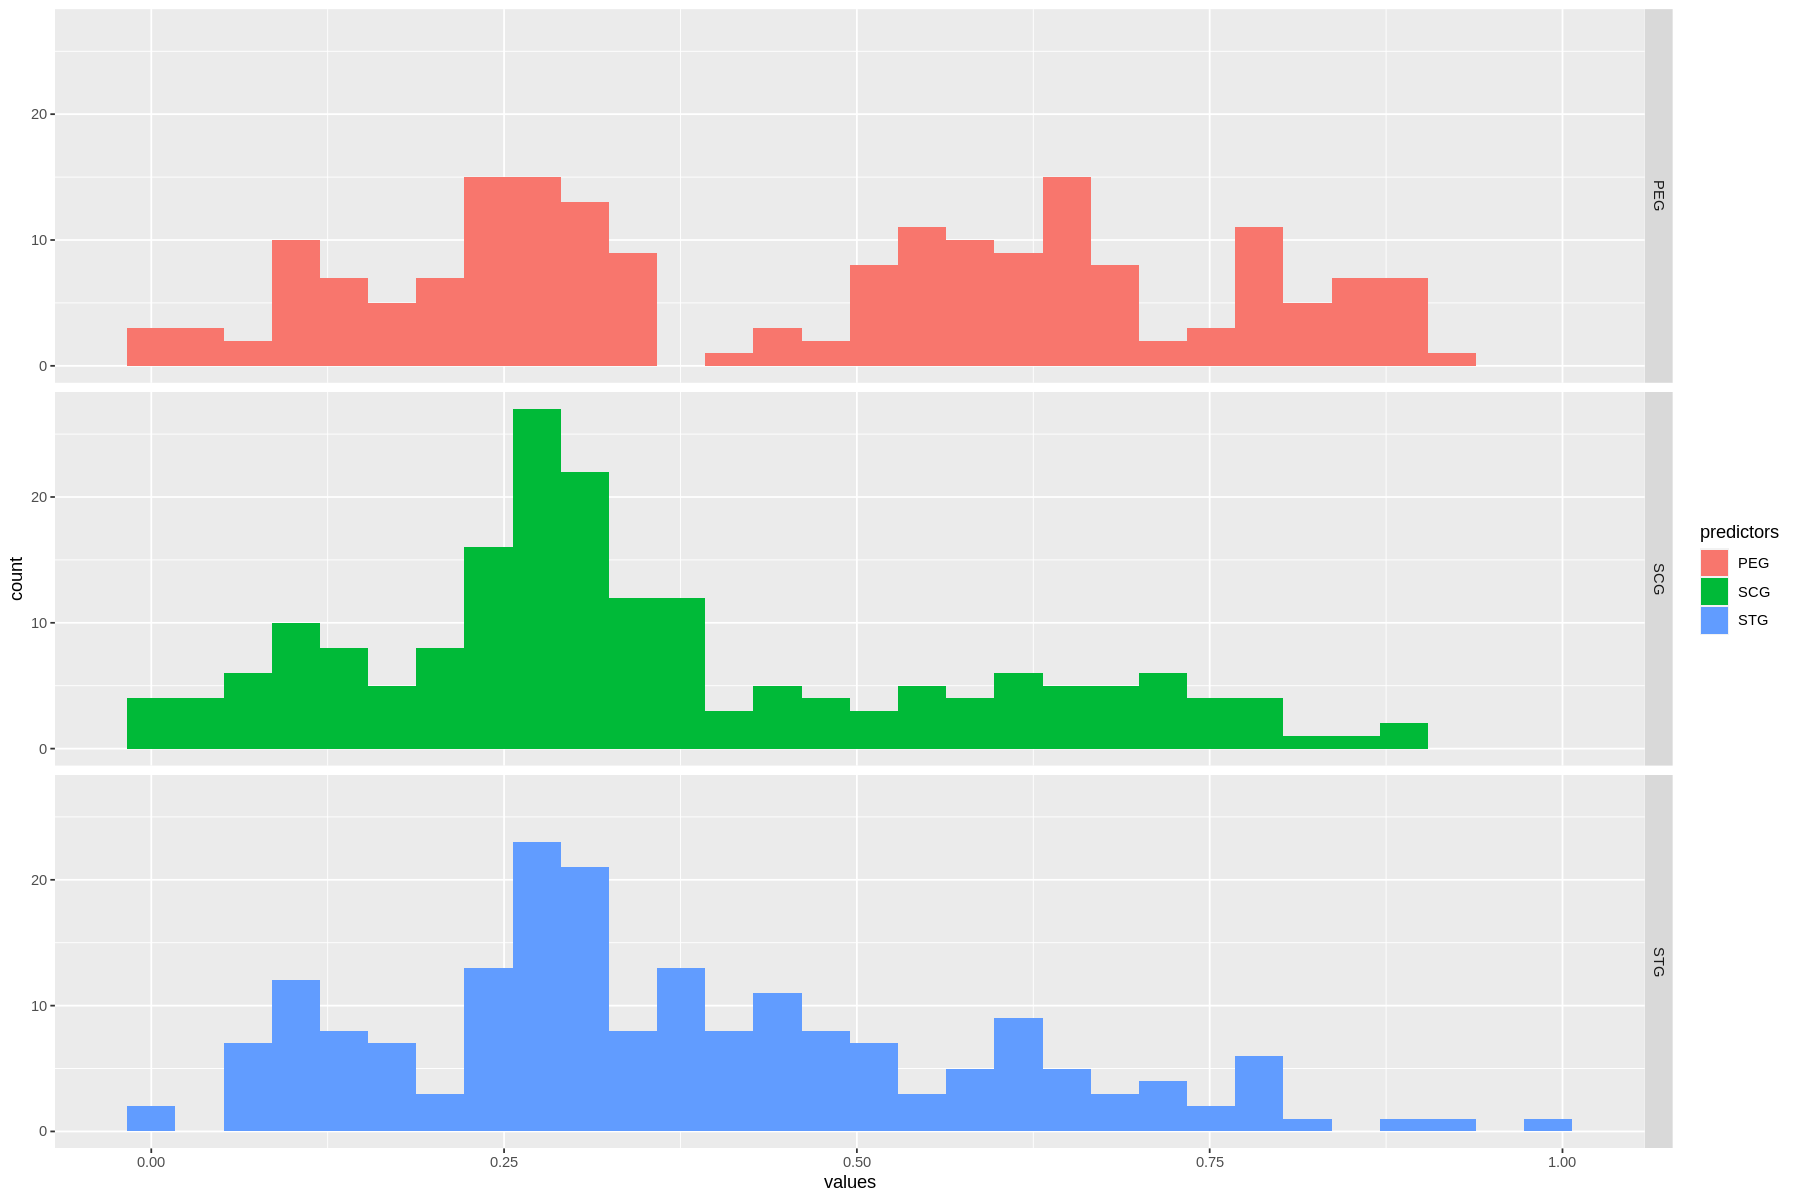

In [32]:
# distributions of the three predictors !!!!!!! How can this be helpful? !!!!!

dist_pred <- user_train_wide |> ggplot(aes(x=values, fill=predictors))+
                                geom_histogram(bins=30)+
                                facet_grid(rows=vars(predictors))
dist_pred

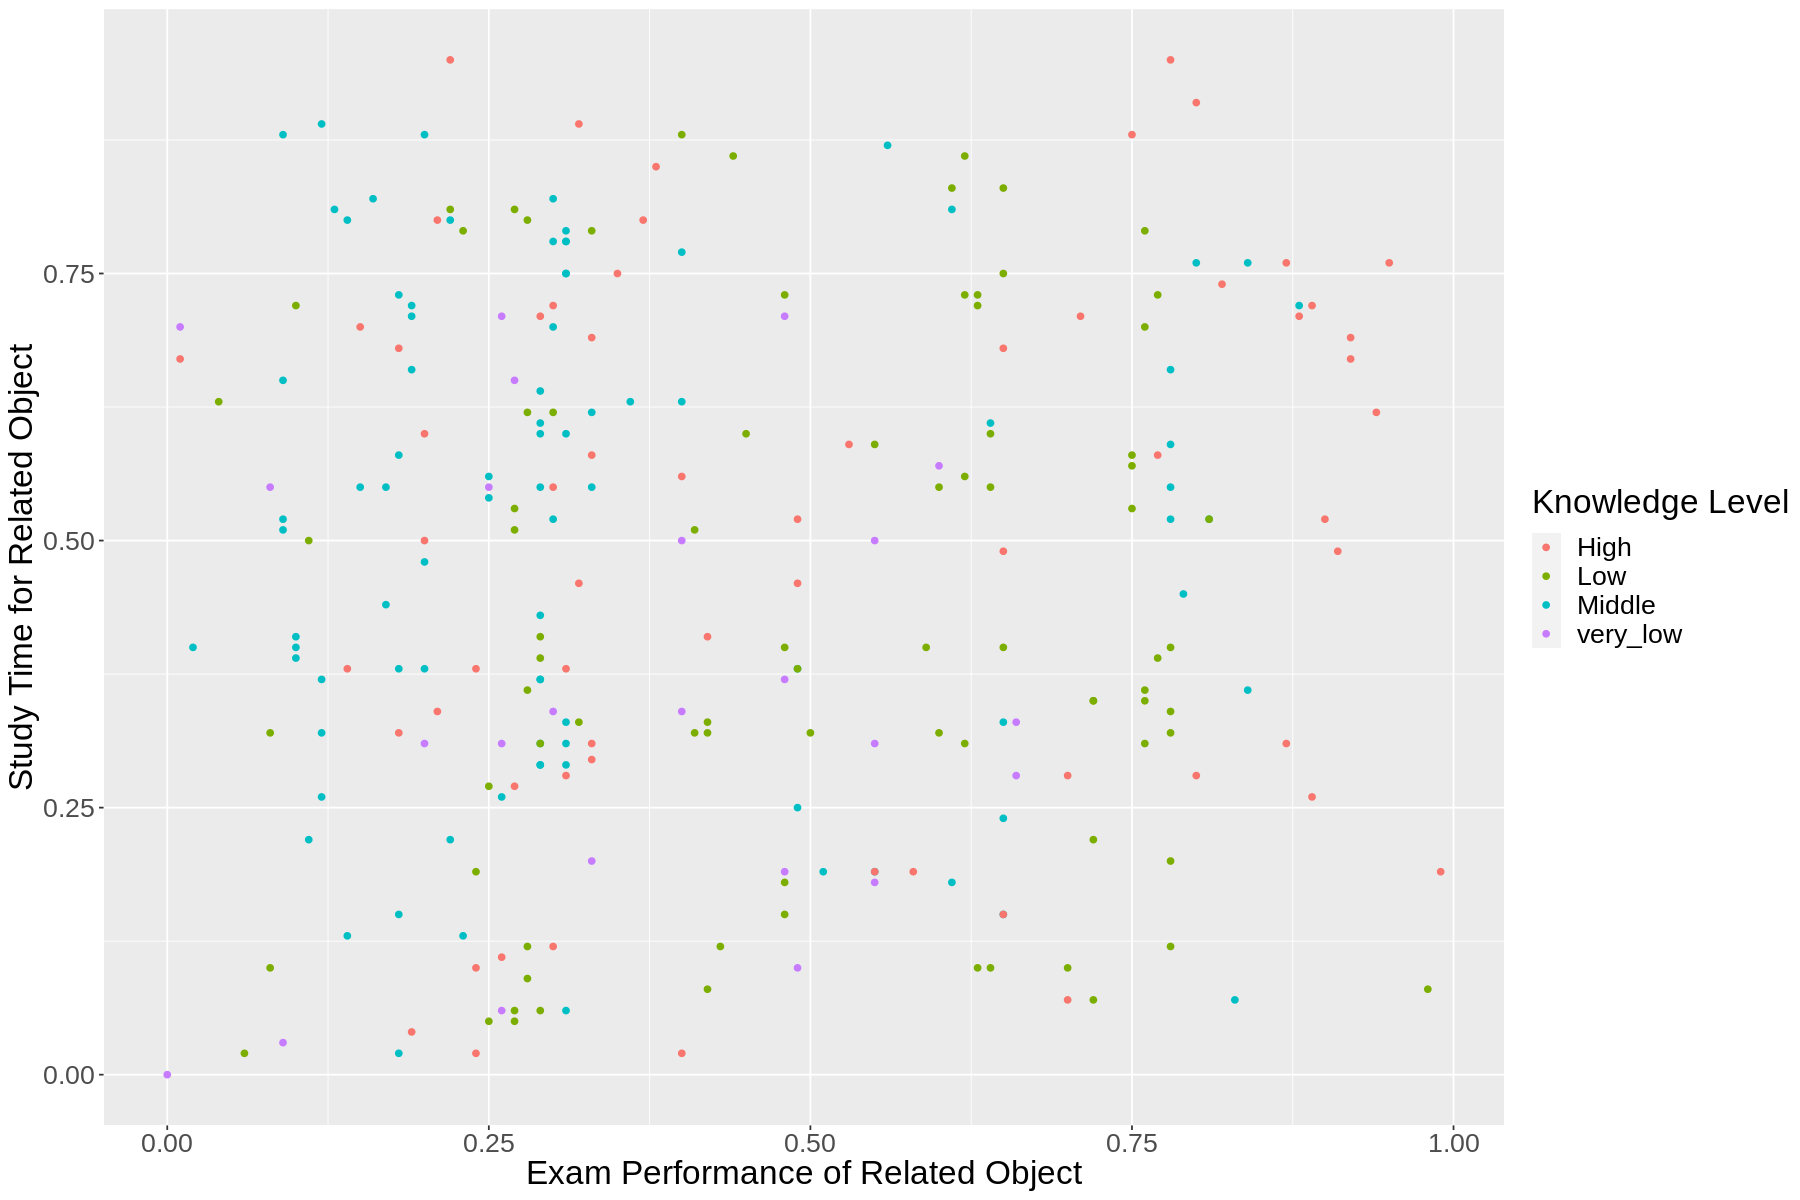

In [27]:
# scatter plot of STR vs LPR to see if the two variables have some power to predict UNS
# It seems that they don't have much power to predict UNS
# which may indicate our decision of excluding these two variables from predictors is correct

library(repr)
options(repr.plot.width=15, repr.plot.height=10)
rel_point <- users |> ggplot(aes(x=LPR,y=STR,colour=UNS))+
                        geom_point()+
                        labs(x="Exam Performance of Related Object", y="Study Time for Related Object",
                            colour="Knowledge Level")+
                        theme(text=element_text(size=20))
rel_point